<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day08_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![pandas logo](http://drive.google.com/uc?export=view&id=1a2QGwlq1iltY7-9T0b07JZxaEBkL_xG_)

# Pandas
* 컬럼의 이름을 따라 데이터를 정렬할 수 있는 자료 구조(data structure). 

* 다양한 소스에서 가져온 다양한 방식으로 색인된 데이터를 핸들링 가능한 기능


* 시계열, 비시계열 데이터 모두 다룰 수 있는 자료 구조

* 산술연산 및 한 축(column을 의미하는 듯)의 모든 값을 더하는 등의 축약연산이 가능

* 누락된 데이터의 유연한 처리 기능

* SQL 같은 관계연산 수행 기능

## Series
* 1차원 배열과 같은구조
* 값을 저장하는 value와 색인를 저장하는 index로 구성
* 동일한 종류의 자료를 저장

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
s = pd.Series(np.random.randn(5))
print(s)

In [0]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

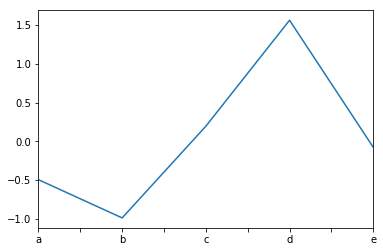

In [0]:
s.plot()

In [0]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [0]:
s.values

array([-0.49508106, -0.98805677,  0.1943138 ,  1.56071342, -0.07757762])

In [0]:
dic = {'a': 0, 'b': 1,  'c': 2}
series1 = pd.Series(dic)

In [0]:
pd.Series(dic, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

* NaN (not a number) 결측치 - 값이 없거나 형식이 안맞는 경우


In [0]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [0]:
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


## DataFrame

* 엑셀과 같이 여러가지의 데이터가 모인 자료구조
* 여러개의 Series가 모인 자료구조

In [0]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01 -0.816515 -0.754784 -0.867407 -0.252371
2013-01-02 -0.607788  0.841311 -0.523780  0.768206
2013-01-03 -1.051236  0.341588 -0.059844 -0.065160
2013-01-04 -0.821683  0.039288  0.343185  1.535739
2013-01-05 -0.178736  0.933309  0.303133 -0.397563
2013-01-06  0.195095 -0.387006  0.549300 -0.747031


In [0]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3]*4, dtype='int32'),
                    'E':['test', 'train', 'test', 'train'],
                    'F': 'foo'})
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [0]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
F            object
dtype: object

### 데이터 확인하기

####  df.head()
 * 처음 5개 데이터 표시
 
#### df.head(n)
* 처음 n개 데이터 표시

In [0]:
df.head()

#### df.tail()
* 마지막 5개 데이터 표시

#### df.tail(n)
* 마지막 n개 데이터 표시

In [0]:
df.tail(3)

#### df.index
* DataFrame의 인덱스를 추출
* 함수가 아니고 속성임

* 컬럼을 보려면 .columns 속성
* numpy 데이터를 보려면 .values 속성을 통해 확인하면 됩니다.

In [0]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

#### df.colums
* DataFrame의 컬럼들을 추출
* 함수가 아니고 속성임

In [0]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

#### df.values
* DataFrame의 value를 추출
* 함수가 아니고 속성임

In [0]:
df.values

array([[-0.78847283, -0.19029675,  0.54119444,  0.20729664],
       [ 0.65829266,  0.12233702, -0.05399776, -0.04247865],
       [-1.58956454, -0.50497195,  0.98378894,  0.78696723],
       [-0.17154334, -0.17287825, -0.50315372, -0.41716768],
       [-0.24681028,  0.97204613, -0.1573483 ,  0.03400614],
       [ 0.5152666 , -0.83307193,  0.25590301,  0.95172909]])

#### df.describe()
 DataFrame의 요약된 통계 정보를 보여줌

In [0]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.270472,-0.101139,0.177731,0.253392
std,0.836501,0.618639,0.532452,0.521502
min,-1.589565,-0.833072,-0.503154,-0.417168
25%,-0.653057,-0.426303,-0.131511,-0.023357
50%,-0.209177,-0.181587,0.100953,0.120651
75%,0.343564,0.048533,0.469872,0.642050
max,0.658293,0.972046,0.983789,0.951729


#### df .T 
* DataFrame에서 index와 column을 바꾼 형태의 DataFrame 
* 속성

In [0]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.788473,0.658293,-1.589565,-0.171543,-0.246810,0.515267
B,-0.190297,0.122337,-0.504972,-0.172878,0.972046,-0.833072
C,0.541194,-0.053998,0.983789,-0.503154,-0.157348,0.255903
D,0.207297,-0.042479,0.786967,-0.417168,0.034006,0.951729


#### df.sort_index()
* axis = 0 : index를 기준으로 정렬
* axis = 1 : column을 기준으로 정렬
* ascending = True : 오름차순
* ascending = Fals : 내림차순

In [0]:
df.sort_index(axis=0, ascending=True)

,A,B,C,D
2013-01-01,-0.788473,-0.190297,0.541194,0.207297
2013-01-02,0.658293,0.122337,-0.053998,-0.042479
2013-01-03,-1.589565,-0.504972,0.983789,0.786967
2013-01-04,-0.171543,-0.172878,-0.503154,-0.417168
2013-01-05,-0.246810,0.972046,-0.157348,0.034006
2013-01-06,0.515267,-0.833072,0.255903,0.951729


In [0]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.207297,0.541194,-0.190297,-0.788473
2013-01-02,-0.042479,-0.053998,0.122337,0.658293
2013-01-03,0.786967,0.983789,-0.504972,-1.589565
2013-01-04,-0.417168,-0.503154,-0.172878,-0.171543
2013-01-05,0.034006,-0.157348,0.972046,-0.246810
2013-01-06,0.951729,0.255903,-0.833072,0.515267


### 데이터 선택하기 (Selection)

In [0]:
print(df['A'])
type(df['A'])

2013-01-01   -0.788473
2013-01-02    0.658293
2013-01-03   -1.589565
2013-01-04   -0.171543
2013-01-05   -0.246810
2013-01-06    0.515267
Freq: D, Name: A, dtype: float64


pandas.core.series.Series

In [0]:
df[0:3]

,A,B,C,D
2013-01-01,-0.788473,-0.190297,0.541194,0.207297
2013-01-02,0.658293,0.122337,-0.053998,-0.042479
2013-01-03,-1.589565,-0.504972,0.983789,0.786967


In [0]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.658293,0.122337,-0.053998,-0.042479
2013-01-03,-1.589565,-0.504972,0.983789,0.786967
2013-01-04,-0.171543,-0.172878,-0.503154,-0.417168


In [0]:
df.iloc[3]

A   -0.171543
B   -0.172878
C   -0.503154
D   -0.417168
Name: 2013-01-04 00:00:00, dtype: float64

In [0]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.171543,-0.172878
2013-01-05,-0.246810,0.972046


In [0]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.658293,-0.053998
2013-01-03,-1.589565,0.983789
2013-01-05,-0.246810,-0.157348


In [0]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.658293,0.122337,-0.053998,-0.042479
2013-01-03,-1.589565,-0.504972,0.983789,0.786967


### 조건을 이용하여 선택하기

In [0]:
print(df)
df[(df.B > 0) & (df.C > 0)]

                   A         B         C         D
2013-01-01 -0.816515 -0.754784 -0.867407 -0.252371
2013-01-02 -0.607788  0.841311 -0.523780  0.768206
2013-01-03 -1.051236  0.341588 -0.059844 -0.065160
2013-01-04 -0.821683  0.039288  0.343185  1.535739
2013-01-05 -0.178736  0.933309  0.303133 -0.397563
2013-01-06  0.195095 -0.387006  0.549300 -0.747031


,A,B,C,D
2013-01-04,-0.821683,0.039288,0.343185,1.535739
2013-01-05,-0.178736,0.933309,0.303133,-0.397563


### 연산



#### mean() 
* 평균구하기
* 컬럼별로 평균

In [0]:
df.mean()

A   -0.270472
B   -0.101139
C    0.177731
D    0.253392
dtype: float64

#### mean(1)
* index 기준으로 평균

In [0]:
df.mean(1)

2013-01-01   -0.057570
2013-01-02    0.171038
2013-01-03   -0.080945
2013-01-04   -0.316186
2013-01-05    0.150473
2013-01-06    0.222457
Freq: D, dtype: float64

### 데이터 합치기
 
 

#### concat

In [0]:
df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))
print(df)

          A         B         C         D
0 -0.864839 -1.744247  1.394333  2.157303
1 -1.239989 -0.520578 -1.101941 -1.537443
2 -0.949169 -0.013183 -1.005318  0.689450
3 -0.133275  0.810338 -0.740206 -0.452096
4 -0.002749  0.579461  0.657609 -1.430407
5  2.103698 -0.490106  0.141132  0.021476
6  0.523234 -0.479610  0.361724 -0.243116
7  0.027446 -1.140889 -1.070930  1.262966
8  0.538778  0.498457 -1.198304 -0.470741
9  1.852740 -0.601611  0.719923 -0.579715


In [0]:
pieces = [df[:3], df[3:7], df[7:]]
print(pieces[0])
print(pieces[1])
print(pieces[2])

In [0]:
pd.concat(pieces)

,A,B,C,D
0,-0.109318,-0.255184,-1.228720,-0.460782
1,-0.739769,0.372388,0.032185,0.307066
2,-1.090253,-0.129609,1.376017,0.876980
3,-0.918436,-1.105901,0.130717,1.741716
4,0.570184,-1.678889,-0.334162,-1.525498
5,0.633631,-0.224343,-1.923253,1.790623
6,1.085334,0.846396,1.582270,-0.054239
7,0.392023,0.015620,0.383075,-0.302815
8,-1.495101,-3.037318,-0.323565,-1.731351
9,1.627042,-0.823900,-0.240779,-1.601275


#### join

In [0]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
print(left)

   key  lval
0  foo     1
1  foo     2


In [0]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(right)

   key  rval
0  foo     4
1  foo     5


In [0]:
merged = pd.merge(left, right, on='key')
print(merged)

   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


In [0]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.180519,0.971945,-0.689293,-0.062675
1,0.807041,0.070674,-0.740652,0.019363
2,-1.079841,0.697301,0.221466,0.249245
3,0.564097,-0.156620,0.209924,0.450662
4,-0.878281,0.062991,2.935862,0.813046
5,-0.922396,0.761114,0.510297,1.311046
6,2.527006,0.148133,-0.808713,1.829058
7,0.613008,0.652039,0.585250,0.805483
8,0.564097,-0.156620,0.209924,0.450662


### 범주형

In [0]:
df2 = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df2

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [0]:
df2['grade'] = df2['raw_grade'].astype('category')
df2['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [0]:
df2['grade'].cat.categories = ['very good', 'good', 'very bad']
df2['grade']


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [0]:
df2["grade"].cat.set_categories(["very good", "good", "very bad"])
print(df2['grade'])

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]
